
## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 30</p>
## <p style="text-align: center;">Due: Thursday, October 12 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Task 1 - Logistic Regression on PCA components - 5 points

In the following code, you have to add few lines to apply logistic regression to the PCA components. Plot the same. 

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head() # 3 kinds of wines(1,2,3), 13 features 



,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)


In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

pca = PCA(n_components=2)
X_train_pca_scikit = pca.fit_transform(X_train_std)
X_train_pca_scikit = -1*X_train_pca_scikit
X_test_pca_scikit = pca.transform(X_test_std)
X_test_pca_scikit = -1*X_test_pca_scikit

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca_scikit,y_train)
y_pred = lr.predict(X_test_pca_scikit)


In [9]:
# Lets plot our decision regions to visualize how well the classification worked
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

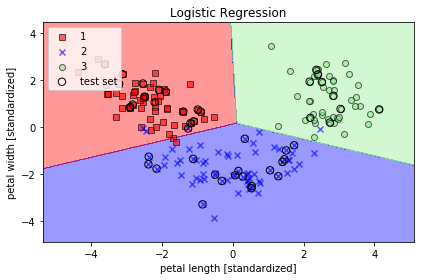

In [10]:
X_combined_std = np.vstack((X_train_pca_scikit, X_test_pca_scikit))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('logistic_regression.png', dpi=300)
plt.show()

### Observation
Those three class are obvious to see in the plot and feww of samples are misclassifed, which means the accurate of classification is good. 

# Task 2 - Adaline Gradient Descent - 10 points

In class we worked on the example of classifying iris dataset into 2 classes using AdalineGD. Now you have to make changes in the follwing code to classify those in 3 classes. Plot the same.

In [168]:
###### ADALINE GRADIENT DESCENT - No changes in this cell

# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        #print(self.net_input(X))
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) <=-0.5, -1, (np.where(self.activation(X) >=0.5, 1, 0)))

In [169]:
## Data read

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model


iris = pd.read_csv("iris.csv")
# The first 50 entries are setosa and the next 50 are versicolor
# extract sepal length and petal length
X = iris.iloc[:, [0, 2]].values
# select setosa and versicolor
y = iris.iloc[:, 4].values
# Lets use a model to learn
# step0 - Lets turn categorical data into numbers
y = np.where(y == 'Iris-setosa',-1,np.where(y=='Iris-virginica',0,1))
# step1 - split the dataset into training and test datasets
# 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [171]:
iris
    

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [172]:
##### Changes to be made in this cell

ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_train_std,y_train)
# Step3: Use the model to predict the test data
y_pred = ada.predict(X_test_std)

print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))


Misclassified samples: 25
Accuracy: 0.44


In [173]:
y_pred


array([ 1,  0, -1,  1, -1,  1, -1,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,
        0, -1, -1,  1,  0, -1, -1,  0, -1, -1,  0,  0, -1,  1,  0, -1,  0,
        1,  0, -1,  1,  0,  0,  1, -1,  0, -1, -1])

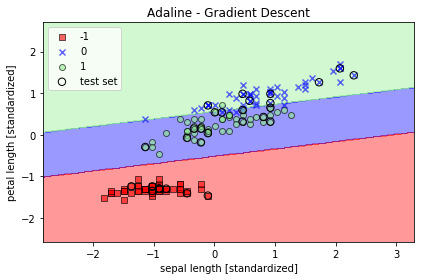

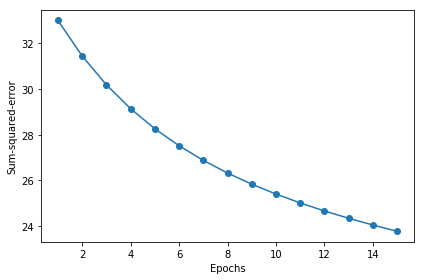

In [174]:
#### To Plot - Changes to be made in this cell.

# Lets plot our decision regions to visualize how well the classification worked
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test_std, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test_std, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test_std[:, 0],
                    X_test_std[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=ada,test_idx=range(70, 100))
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./adalineGD.png', dpi=300)
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

# Task - 3 Support Vector Machines - 10 points

Repeat the above task, but instead of using Adaline Gradient Descent, use SVM to classify into 3 classes. 
You can directly use the data read in the above task.

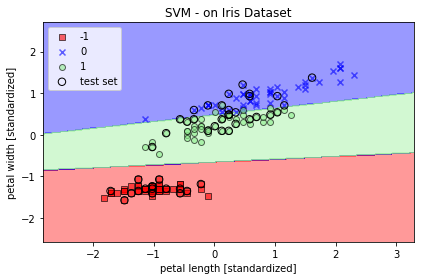

In [176]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('support_vector_machine_linear.png', dpi=300)
plt.show()

# Task4 - AWS EC2 and Jupyter - 5 points
1. Complete the AWS cli installation
2. Create and EC2 instance with your name, using the instructions posted on Canvas
3. ssh into your instance and install anaconda+jupyter following instrctions posted on Canvas
4. Take a screenshot of the Browser running the Jupyter notbook showing your instance's IP address.

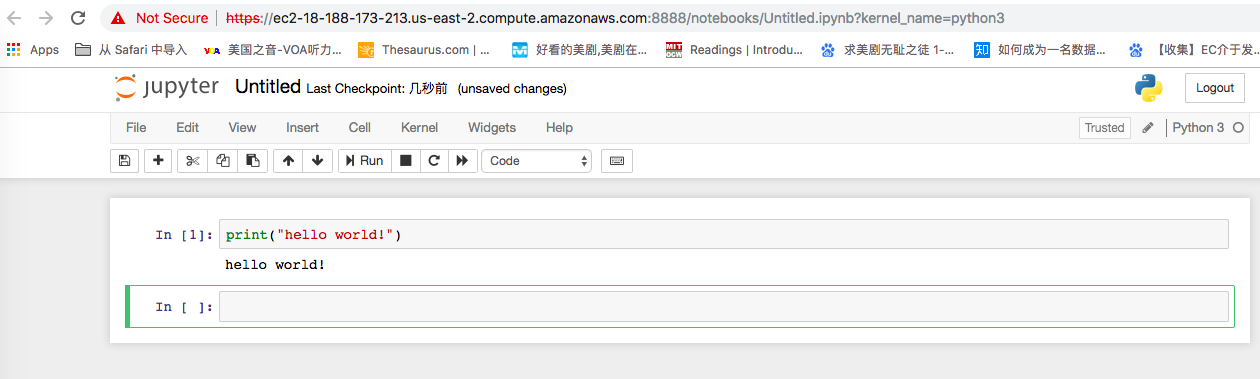

In [2]:
from IPython.display import Image
Image("2.png")